In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [3]:
cur_path

'C:\\Users\\dell\\Desktop\\Traffic sign classification'

In [3]:
print("Loading images and labels...")

# Retrieving the images and their labels
for i in range(classes):
    path = os.path.join(cur_path, 'train', str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\' + a)
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(f"Error loading image {a}: {e}")

Loading images and labels...


In [4]:
data = np.array(data)
labels = np.array(labels)

print(f"Loaded {data.shape[0]} images with shape {data.shape[1:]}")


Loaded 39209 images with shape (30, 30, 3)


In [5]:
data.shape

(39209, 30, 30, 3)

In [6]:
labels.shape

(39209,)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")

Training data shape: (31367, 30, 30, 3), Test data shape: (7842, 30, 30, 3)


In [25]:
X_train=X_train/255.0
X_test=X_test/255.0

In [30]:
X_train

array([[[[ 41,  42,  38],
         [ 54,  51,  43],
         [ 61,  56,  51],
         ...,
         [ 38,  41,  41],
         [ 38,  42,  42],
         [ 38,  42,  42]],

        [[ 49,  55,  41],
         [ 62,  72,  53],
         [ 52,  60,  48],
         ...,
         [ 34,  39,  39],
         [ 34,  39,  38],
         [ 35,  38,  37]],

        [[ 73,  81,  53],
         [ 82,  96,  67],
         [ 76,  90,  67],
         ...,
         [ 35,  39,  41],
         [ 34,  38,  39],
         [ 38,  40,  41]],

        ...,

        [[120, 123, 118],
         [ 74,  83,  88],
         [ 62,  73,  70],
         ...,
         [105, 117, 104],
         [101, 115, 103],
         [117, 127, 113]],

        [[121, 124, 114],
         [ 92,  98,  99],
         [ 82,  90,  81],
         ...,
         [ 99, 109,  93],
         [104, 115, 101],
         [111, 124, 114]],

        [[121, 116,  98],
         [119, 114, 101],
         [108, 108,  86],
         ...,
         [ 94, 105,  89],
        

In [31]:
y_test

array([26, 15, 13, ...,  8,  7, 20])

In [27]:
X_train.shape

(31367, 30, 30, 3)

In [32]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [ ]:
y_train

In [33]:
X_train.shape[1:]

(30, 30, 3)

In [34]:
print("Building model...")
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

Building model...


In [35]:
print("Compiling model...")
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Compiling model...


In [36]:
epochs = 20
print(f"Starting model training for {epochs} epochs...")
history = model.fit(X_train, y_train, batch_size=42, epochs=epochs, validation_data=(X_test, y_test))

Starting model training for 20 epochs...
Epoch 1/20
747/747 ━━━━━━━━━━━━━━━━━━━━ 75s 93ms/step - accuracy: 0.3093 - loss: 3.3421 - val_accuracy: 0.9119 - val_loss: 0.3614
Epoch 2/20
747/747 ━━━━━━━━━━━━━━━━━━━━ 162s 199ms/step - accuracy: 0.8219 - loss: 0.6347 - val_accuracy: 0.9527 - val_loss: 0.1824
Epoch 3/20
747/747 ━━━━━━━━━━━━━━━━━━━━ 69s 93ms/step - accuracy: 0.9330 - loss: 0.2409 - val_accuracy: 0.9811 - val_loss: 0.0687
Epoch 6/20
747/747 ━━━━━━━━━━━━━━━━━━━━ 83s 93ms/step - accuracy: 0.9454 - loss: 0.1874 - val_accuracy: 0.9852 - val_loss: 0.0541
Epoch 7/20
747/747 ━━━━━━━━━━━━━━━━━━━━ 71s 78ms/step - accuracy: 0.9508 - loss: 0.1835 - val_accuracy: 0.9791 - val_loss: 0.0826
Epoch 8/20
747/747 ━━━━━━━━━━━━━━━━━━━━ 103s 137ms/step - accuracy: 0.9559 - loss: 0.1714 - val_accuracy: 0.9816 - val_loss: 0.0676
Epoch 10/20
747/747 ━━━━━━━━━━━━━━━━━━━━ 92s 123ms/step - accuracy: 0.9487 - loss: 0.2032 - val_accuracy: 0.9852 - val_loss: 0.0520
Epoch 11/20
747/747 ━━━━━━━━━━━━━━━━━━━━ 15

In [41]:
history.score(X_test,y_test)

AttributeError: 'History' object has no attribute 'score'

In [42]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

246/246 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9852 - loss: 0.0590
Test Loss: 0.0543
Test Accuracy: 0.9869


In [17]:
model.save("my_model.h5")
print("Model saved as 'my_model.h5'.")

Model saved as 'my_model.h5'.


Plotting accuracy and loss graphs...


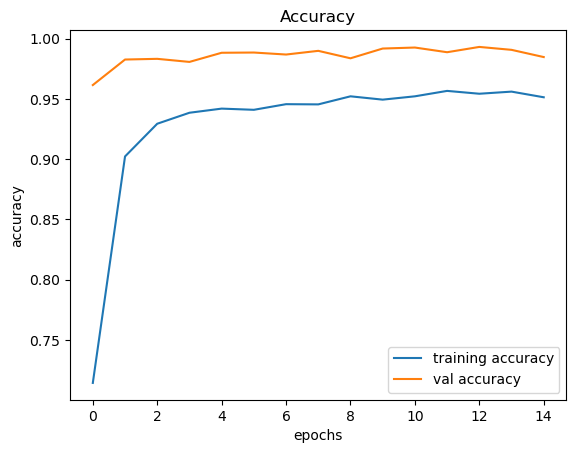

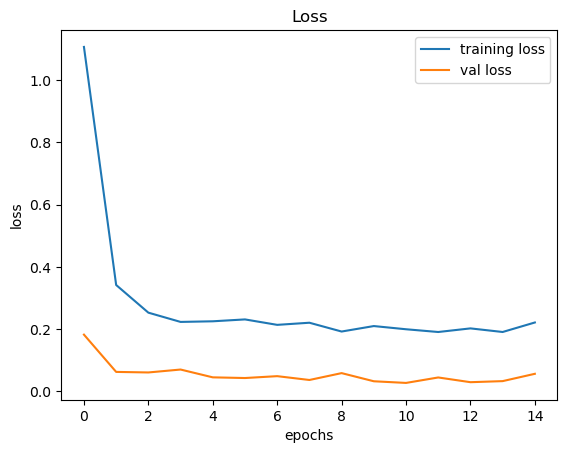

In [64]:
print("Plotting accuracy and loss graphs...")
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig('accuracy_graph.png') 
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.savefig('loss_graph.png') 
plt.show()

In [65]:
# Testing accuracy on the test dataset
print("Testing accuracy on test dataset...")
y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []

for img in imgs:
    image = Image.open(img)
    image = image.resize((30, 30))
    data.append(np.array(image))

X_test = np.array(data)

Testing accuracy on test dataset...


In [20]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)

395/395 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step


In [66]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(labels, pred)
print(f"Test accuracy: {accuracy}")

Test accuracy: 0.9533650039588282


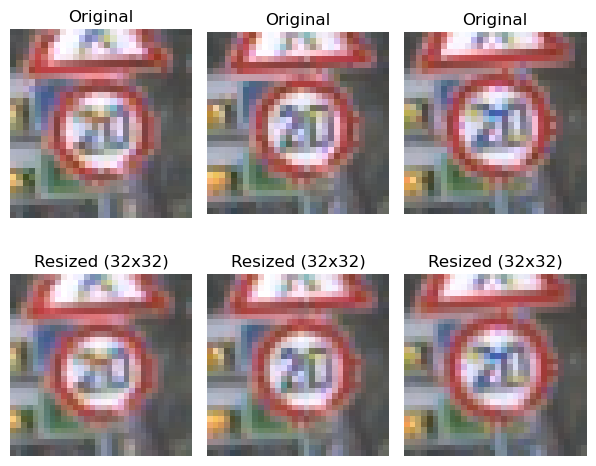

In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Define the path to the dataset (Modify it according to your dataset location)
cur_path = os.getcwd()
class_label = "0"  # Choose a specific class folder for visualization
path = os.path.join(cur_path, 'train', class_label)

# Load some images from the dataset
images = os.listdir(path)[:3]  # Select first 5 images for display

# Create figure for visualization
plt.figure(figsize=(10, 5))

for i, img_name in enumerate(images):
    try:
        # Load original image
        img_path = os.path.join(path, img_name)
        original_img = Image.open(img_path)
        
        # Resize image
        resized_img = original_img.resize((32, 32))

        # Convert images to numpy arrays for display
        original_img = np.array(original_img)
        resized_img = np.array(resized_img)

        # Display original image
        plt.subplot(2, 5, i + 1)  # 2 rows, 5 columns
        plt.imshow(original_img)
        plt.title("Original")
        plt.axis("off")

        # Display resized image
        plt.subplot(2, 5, i + 6)  # Second row
        plt.imshow(resized_img)
        plt.title("Resized (32x32)")
        plt.axis("off")

    except Exception as e:
        print(f"Error loading image {img_name}: {e}")

plt.tight_layout()
plt.show()


In [11]:
plt.savefig("image_comparison.png", dpi=300)  # Saves the full grid as an image
plt.show()


<Figure size 640x480 with 0 Axes>

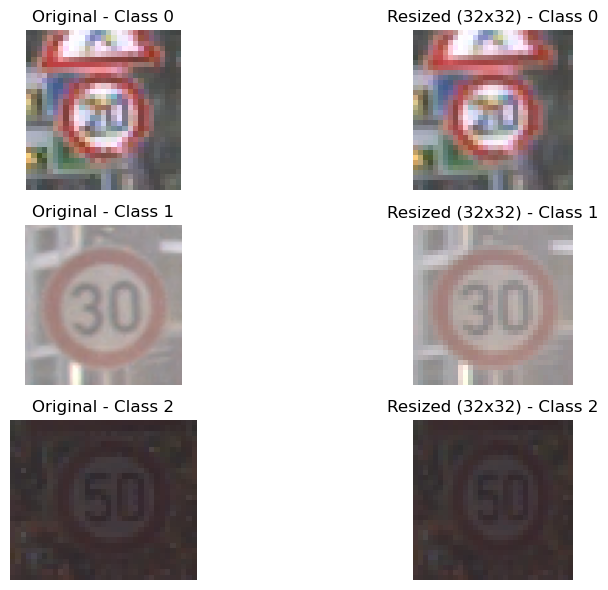

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Define the dataset path
cur_path = os.getcwd()  # Change this to your dataset path
sample_images = 3  # Number of images to display

plt.figure(figsize=(10, sample_images * 2))  # Adjust figure size

for i in range(sample_images):  
    try:
        # Load the original image
        img_path = os.path.join(cur_path, "train", str(i), os.listdir(os.path.join(cur_path, "train", str(i)))[0])
        original_img = Image.open(img_path)

        # Resize the image
        resized_img = original_img.resize((32, 32))

        # Convert images to arrays for displaying
        original_array = np.array(original_img)
        resized_array = np.array(resized_img)

        # Plot Original Image
        plt.subplot(sample_images, 2, 2 * i + 1)
        plt.imshow(original_array)
        plt.title(f"Original - Class {i}")
        plt.axis("off")

        # Plot Resized Image
        plt.subplot(sample_images, 2, 2 * i + 2)
        plt.imshow(resized_array)
        plt.title(f"Resized (32x32) - Class {i}")
        plt.axis("off")

    except Exception as e:
        print(f"Error loading image for class {i}: {e}")

# Save the entire figure as a single image
plt.tight_layout()
plt.savefig("comparison_all.png", dpi=300)  # Save as high-resolution PNG
plt.show()  # Display the figure


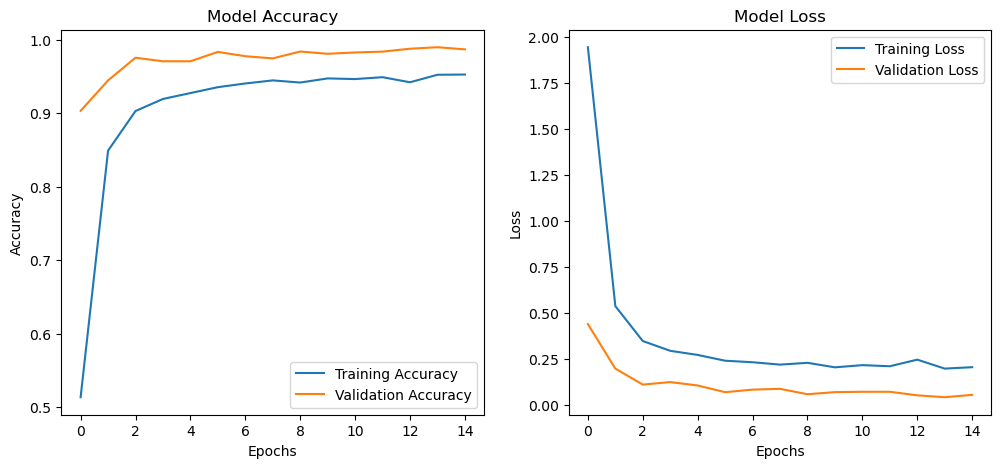

In [47]:
# Accuracy and Loss Graphs
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


NameError: name 'pred' is not defined

In [38]:
predictions = model.predict(X_test)

# Convert probabilities to class labels
pred = np.argmax(predictions, axis=1)

395/395 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step


In [49]:
predictions

array([[0.0000000e+00, 1.3201944e-37, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.4966744e-07, 5.3818407e-03, 5.6844570e-02, ..., 1.9662347e-07,
        6.2116715e-11, 2.7190636e-13],
       [1.2095065e-11, 5.3603532e-07, 1.5639303e-05, ..., 6.3376276e-11,
        7.2705791e-14, 2.4838439e-15],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [4.3535985e-26, 5.1065887e-22, 3.5602785e-33, ..., 5.1767048e-38,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        7.4029313e-32, 0.0000000e+00]], dtype=float32)

In [25]:
pred

array([16,  1, 38, ...,  5,  7, 10], dtype=int64)

In [37]:
# Load the test dataset from Test.csv
import pandas as pd
test_data = pd.read_csv('Test.csv')

# Ensure you are only using the correct number of test samples
y_true = test_data["ClassId"].values  # True labels (should match test set size)
imgs = test_data["Path"].values       # Image paths

# Load and preprocess the test images
X_test = []
for img in imgs:
    image = Image.open(img)
    image = image.resize((30, 30))  # Resize to match training input size
    X_test.append(np.array(image))

X_test = np.array(X_test)  # Convert list to numpy array

# Ensure correct shape
print(f"X_test shape: {X_test.shape}")
print(f"y_true shape: {y_true.shape}")


X_test shape: (12630, 30, 30, 3)
y_true shape: (12630,)


In [ ]:
pred.shape

In [58]:
import pandas as pd

print(type(y_test))  # If it's a list or other type


<class 'pandas.core.frame.DataFrame'>


In [52]:
y_test.shape

(12630, 8)

In [48]:
import numpy as np
if len(y_test.shape) > 1:
    y_test = np.argmax(y_test, axis=1)

TypeError: '>' not supported between instances of 'str' and 'int'

In [41]:
y_test

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
...,...,...,...,...,...,...,...,...
12625,42,41,5,6,37,36,12,Test/12625.png
12626,50,51,6,5,45,46,33,Test/12626.png
12627,29,29,6,6,24,24,6,Test/12627.png
12628,48,49,5,6,43,44,7,Test/12628.png


In [42]:
if len(pred.shape) > 1:
    pred = np.argmax(pred, axis=1)

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Convert to class indices if needed
if y_test.ndim > 1:
    y_test = np.argmax(y_test, axis=1)
if pred.ndim > 1:
    pred = np.argmax(pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, pred)

# Class names
class_names = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)','Speed limit (70km/h)'
,'Speed limit (80km/h)'
,'End of speed limit (80km/h)'
,'Speed limit (100km/h)'
,'Speed limit (120km/h)'
,'No passing'
,'No passing veh over 3.5 tons'
,'Right-of-way at intersection'
,'Priority road'
,'Yield'
,'Stop'
,'No vehicles'
,'Veh > 3.5 tons prohibited'
,'No entry'
,'General caution'
,'Dangerous curve left'
,'Dangerous curve right'
,'Double curve'
,'Bumpy road'
,'Slippery road'
,'Road narrows on the right'
,'Road work'
,'Traffic signals'
,'Pedestrians'
,'Children crossing'
,'Bicycles crossing'
,'Beware of ice/snow'
,'Wild animals crossing'
,'End speed + passing limits'
,'Turn right ahead'
,'Turn left ahead'
,'Ahead only'
,'Go straight or right'
,'Go straight or left'
,'Keep right'
,'Keep left'
,'Roundabout mandatory'
,'End of no passing'
,'End no passing veh > 3.5 tons']

# Plot heatmap
plt.figure(figsize=(16,10))  # Adjust size based on the number of classes
sns.heatmap(cm, 
            annot=True, 
            fmt='d', 
            cmap='Blues', 
            xticklabels=class_names,  # Set xticks to class names
            yticklabels=class_names,  # Set yticks to class names
            cbar=True,               # Show color bar
            annot_kws={'size': 10},   # Adjust annotation size for better readability
            linewidths=0.5,           # Add spacing between cells
            linecolor='white'        # Line color between cells
           )

# Rotate labels for better visibility
plt.xticks(rotation=90, ha='center', fontsize=10)  # Rotate x-axis labels
plt.yticks(rotation=0, ha='right', fontsize=10)   # Rotate y-axis labels

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')

# Add some padding
plt.tight_layout()
plt.savefig('heatmap.png', bbox_inches='tight')


plt.show()


TypeError: '>' not supported between instances of 'str' and 'int'

In [76]:
plt.savefig('heatmap.png', bbox_inches='tight')  # Save the plot to a file


<Figure size 640x480 with 0 Axes>

In [17]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('my_model.h5')


In [18]:
y_pred = model.predict(X_test)

# If it's a multi-class classification problem and the output is one-hot encoded, convert it to class indices
if y_pred.ndim > 1:
    y_pred = np.argmax(y_pred, axis=1)

246/246 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step


In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
precision = precision_score(labels, pred, average='weighted')
recall = recall_score(labels, pred, average='weighted')
f1 = f1_score(labels, pred, average='weighted')
accuracy = accuracy_score(labels, pred)


In [75]:
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Test accuracy: {accuracy}")

# Display classification report
print("\nClassification Report:")
print(classification_report(labels, pred))

Precision: 0.9543
Recall: 0.9534
F1 Score: 0.9526
Test accuracy: 0.9533650039588282

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.98      0.96      0.97       720
           2       0.93      0.98      0.95       750
           3       0.96      0.91      0.93       450
           4       0.97      0.96      0.97       660
           5       0.85      0.96      0.90       630
           6       1.00      0.87      0.93       150
           7       0.92      0.95      0.93       450
           8       0.98      0.98      0.98       450
           9       0.95      1.00      0.97       480
          10       0.99      0.98      0.98       660
          11       0.98      0.96      0.97       420
          12       0.97      0.97      0.97       690
          13       0.98      1.00      0.99       720
          14       0.97      1.00      0.98       270
          15       0.91    

In [71]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Get predicted probabilities
y_pred_probs = model.predict(X_test)

# Convert to class labels (taking the index of the highest probability)
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert one-hot encoded y_test back to class labels
y_true = np.argmax(y_test, axis=1)

 

395/395 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step


TypeError: '>' not supported between instances of 'str' and 'int'